In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2

# Importing DataSet

In [2]:
from sklearn.datasets import load_digits

In [3]:
load_digits(return_X_y=True)[0].shape
#Remember this its format to check the shape of 

(1797, 64)

In [4]:
data = load_digits(return_X_y=True)
X = data[0]
y = data[1]

print X.shape, y.shape
print X[0].shape

(1797, 64) (1797,)
(64,)


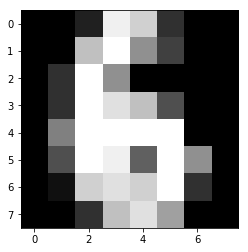

In [5]:
plt.figure(0)
plt.imshow(X[452].reshape((8,8)) , cmap='gray')#reshaping is being done otherwise u will encounter a dimension error
#original dim was 64, so while reshaping we need to 2 number whose multiplivcation would be equal to 64
#we can also take 16x4 or anything else consequently image shape will change accordingly
plt.show()

# Data Preparation

In [6]:
ds = np.concatenate((X , y.reshape((-1 ,1))) , axis=1)
print ds.shape

(1797, 65)


In [7]:
train = ds[:1500]
test = ds[1500:]

print train.shape
print test.shape

(1500, 65)
(297, 65)


In [8]:
def test_on_set(train , test , k=3):
    
    pred = []#empty list for predicted output
    target = []#empty list for actual output
    
    #Iterating over each entry of testing
    for i in range(test.shape[0]):
        
        out = knn(train , test[i , :-1], k=k)
        #passing whole train data to train the model and one test entry to predict ouput
        
        pred.append(out)
        target.append(test[i , -1])#last column is of label or actual output
        
    pred = np.asarray(pred)
    target = np.asarray(target)
    
    
    #ACCURACY CALCULATION
    acc = float((pred == target).sum()) / len(pred)
    return acc
        
        

In [9]:
# KNN
def knn(train , test , k = 5):
    
    dist = []
    #train contains our data
    #we will iterate over each row of the data
    for i in range(train.shape[0]):
        
        #Getting the point(vector) and label
        ix = train[i , :-1]#all columns except last column
        iy = train[i , -1]#only last column
        
        #compute distance of test point with every point in the train data
        
        d = distance(ix , test)
        
        #we are maintaing a list named distance in which we are appending 
        #distances of test point with every other point
        #iy(label) is been used to know that distance is with which point 
        dist.append([d , iy])
    
    #we are done with distance computation part
    #next step is sorting
    
    sorted_distance = sorted(dist , key=lambda x:x[0])[:k]
    #distance has been sorted according to x[0] of distance list which has distance
    #[:k] means taking first k values of that list or we can say taking the k nearest neighbours
    
    #getting labels
    labels = np.array(sorted_distance)[: , -1]
    
    #checking the frequency of labels 
    freq = np.unique(labels , return_counts = True)
    
    
    #find max frequency and its label
    index = np.argmax(freq[1])
    return freq[0][index]

#Eucledian Distance
#here the distance is being calculated using vectors which is easy and convienent
def distance(v1 , v2):
    return np.sqrt(((v1-v2)**2).sum())
        

In [10]:
#Calculating accuracies for different values of k
accs = []
ks = [1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15]

for kx in ks:
    acx = test_on_set(train, test, k=kx)
    accs.append(acx)


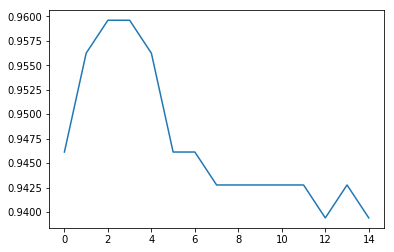

In [11]:
#Plotting Accuracies
plt.plot(accs)